## 난임 환자 대상 임신 성공 여부 예측

### LGAimers 6th 온라인 해커톤

Import

In [1]:
import pandas as pd
import lightgbm as lgb
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier

### Data Load

In [2]:
# 데이터 로드
Total_train = pd.read_csv('../data/Total_train_dataset_30_copy.csv')
Total_test = pd.read_csv('../data/Total_test_dataset_30_copy.csv')

In [3]:
# ID 열을 제외한 특성과 타겟 변수 분리
Total_X = Total_train.drop(['임신_성공_여부', 'ID'], axis=1)
Total_y = Total_train['임신_성공_여부']

### 인코딩 

In [4]:
Total_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256342 entries, 0 to 256341
Columns: 104 entries, 시술_시기_코드 to 혼합된_난자_수_비율
dtypes: float64(45), int64(50), object(9)
memory usage: 203.4+ MB


In [5]:
Total_categorical_columns = [
    "시술_시기_코드",
    "시술_당시_나이",
    "특정_시술_유형",
    "배란_유도_유형",
    "단일_배아_이식_여부",
    "착상_전_유전_진단_사용_여부",
    "배아_생성_주요_이유",
    "총_생성_배아_수",
    "미세주입된_난자_수",
    "미세주입에서_생성된_배아_수",
    "이식된_배아_수",
    "미세주입_배아_이식_수",
    "저장된_배아_수",
    "미세주입_후_저장된_배아_수",
    "해동된_배아_수",
    "해동_난자_수",
    "수집된_신선_난자_수",
    "저장된_신선_난자_수",
    "혼합된_난자_수",
    "파트너_정자와_혼합된_난자_수",
    "기증자_정자와_혼합된_난자_수",
    "난자_출처",
    "정자_출처",
    "난자_기증자_나이",
    "정자_기증자_나이",
    "동결_배아_사용_여부",
    "신선_배아_사용_여부",
    "기증_배아_사용_여부",
    "대리모_여부",
    "ICSI_배아_이식_비율",
    "ICSI_배아_생성_비율",
    "ICSI_성공률"
]

In [6]:
# 모든 범주형 변수를 문자열로 변환
Total_X[Total_categorical_columns] = Total_X[Total_categorical_columns].astype(str)
Total_test[Total_categorical_columns] = Total_test[Total_categorical_columns].astype(str)

# OrdinalEncoder를 사용하여 범주형 변수 인코딩
Total_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

Total_X[Total_categorical_columns] = Total_encoder.fit_transform(Total_X[Total_categorical_columns])
Total_test[Total_categorical_columns] = Total_encoder.transform(Total_test[Total_categorical_columns])

## Modeling

In [7]:
# 데이터 분할
Total_X_train, Total_X_test, Total_y_train, Total_y_test = train_test_split(Total_X, Total_y, test_size=0.2, random_state=42)

### Total 데이터

In [ ]:
import lightgbm as lgb
import catboost as cb
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# LightGBM 모델 초기화
lgb_model = lgb.LGBMClassifier(
    n_estimators=7534,
    num_leaves=51,
    learning_rate=0.0006466079722720145,
    reg_alpha=5.390917786114456e-06,
    reg_lambda=0.00014388089013544448,
    metric='auc',
    objective='binary',
    random_state=42,
    boosting_type='gbdt',
    verbose=-1
)

# CatBoost 모델 초기화
cat_model = cb.CatBoostClassifier(
    iterations=3340,
    learning_rate=0.012407245927924719,
    depth=15,
    min_data_in_leaf=15,
    l2_leaf_reg=2.9236490699597746,
    random_strength=6.550787925020327,
    bagging_temperature=2.298111709976498,
    border_count=64,
    scale_pos_weight=2.076418622223392,
    grow_policy='Lossguide',
    random_state=42,
    eval_metric='AUC',
    logging_level='Silent',
    thread_count=-1
)

# XGBoost 모델 초기화
xgb_model = xgb.XGBClassifier(
    n_estimators=2717,
    learning_rate=0.011061644230637697,
    max_depth=6,
    min_child_weight=2,
    gamma=3.3096409895054855,
    subsample=0.8870073463319801,
    colsample_bytree=0.5049221703175945,
    reg_alpha=3.9960092400982936,
    reg_lambda=1.5017883088044244,
    objective='binary:logistic',
    eval_metric='auc',
    random_state=42,
    use_label_encoder=False,
    verbosity=0
)

# 모델 학습
lgb_model.fit(Total_X_train, Total_y_train)
cat_model.fit(Total_X_train, Total_y_train, eval_set=(Total_X_test, Total_y_test), verbose=False)
xgb_model.fit(Total_X_train, Total_y_train, eval_set=[(Total_X_test, Total_y_test)], verbose=False)

# 예측 확률
lgb_pred_proba = lgb_model.predict_proba(Total_X_test)[:, 1]
cat_pred_proba = cat_model.predict_proba(Total_X_test)[:, 1]
xgb_pred_proba = xgb_model.predict_proba(Total_X_test)[:, 1]


--- Model Performance ---
Model Accuracy: 0.738613977257212
Model F1 Score: 0.3527025068830605
Model AUC: 0.7385707894485515


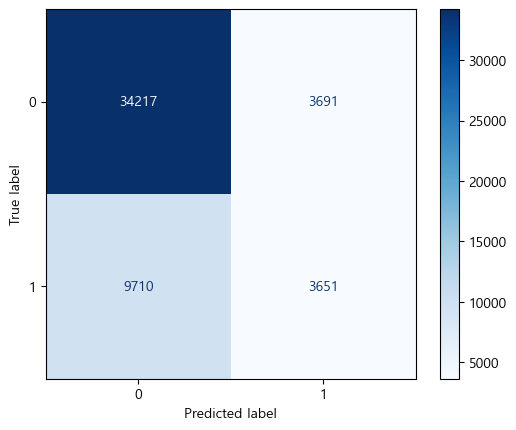

In [13]:
# 소프트 보팅 (예측 확률의 평균)
y_pred_proba = (lgb_pred_proba + cat_pred_proba + xgb_pred_proba) / 3
y_pred = np.where(y_pred_proba > 0.5, 1, 0)

# 평가
accuracy = accuracy_score(Total_y_test, y_pred)
f1 = f1_score(Total_y_test, y_pred)
auc = roc_auc_score(Total_y_test, y_pred_proba)
cm = confusion_matrix(Total_y_test, y_pred)

# 결과 출력
print()
print("--- Model Performance ---")
print(f"Model Accuracy: {accuracy}")
print(f"Model F1 Score: {f1}")
print(f"Model AUC: {auc}")

# 혼동 행렬 출력
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgb_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


--- Model Performance ---
Model Accuracy: 0.6857360198170435
Model F1 Score: 0.49869321717486004
Model AUC: 0.7381669453658272


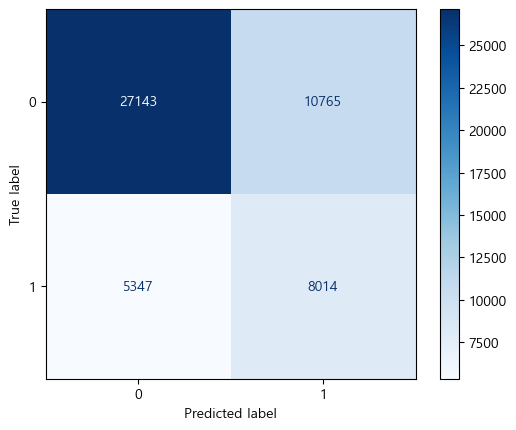

In [17]:
# 소프트 보팅 (조건에 따른 예측 확률 결정)
y_pred_proba = np.where(
    (lgb_pred_proba > 0.3) & (cat_pred_proba > 0.3) & (xgb_pred_proba > 0.3),
    np.maximum(np.maximum(lgb_pred_proba, cat_pred_proba), xgb_pred_proba),
    np.where(
        (lgb_pred_proba < 0.2) & (cat_pred_proba < 0.2) & (xgb_pred_proba < 0.2),
        np.minimum(np.minimum(lgb_pred_proba, cat_pred_proba), xgb_pred_proba),
        (lgb_pred_proba + cat_pred_proba + xgb_pred_proba) / 3
    )
)
y_pred = np.where(y_pred_proba > 0.5, 1, 0)

# 평가
accuracy = accuracy_score(Total_y_test, y_pred)
f1 = f1_score(Total_y_test, y_pred)
auc = roc_auc_score(Total_y_test, y_pred_proba)
cm = confusion_matrix(Total_y_test, y_pred)

# 결과 출력
print()
print("--- Model Performance ---")
print(f"Model Accuracy: {accuracy}")
print(f"Model F1 Score: {f1}")
print(f"Model AUC: {auc}")

# 혼동 행렬 출력
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgb_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


--- Model Performance ---
Model Accuracy: 0.6993114747703291
Model F1 Score: 0.48807863452214917
Model AUC: 0.7383153800435163


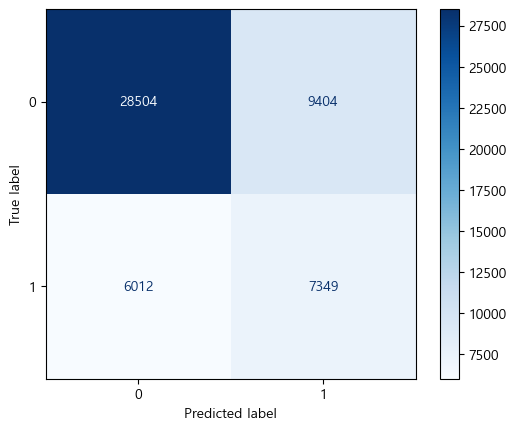

In [18]:
# 소프트 보팅 (조건에 따른 예측 확률 결정)
y_pred_proba = np.where(
    (lgb_pred_proba > 0.35) & (cat_pred_proba > 0.35) & (xgb_pred_proba > 0.35),
    np.maximum(np.maximum(lgb_pred_proba, cat_pred_proba), xgb_pred_proba),
    np.where(
        (lgb_pred_proba < 0.25) & (cat_pred_proba < 0.25) & (xgb_pred_proba < 0.25),
        np.minimum(np.minimum(lgb_pred_proba, cat_pred_proba), xgb_pred_proba),
        np.where(
            ((lgb_pred_proba > 0.35) & (cat_pred_proba > 0.35)) | ((lgb_pred_proba > 0.35) & (xgb_pred_proba > 0.35)) | ((cat_pred_proba > 0.35) & (xgb_pred_proba > 0.35)),
            np.maximum(np.maximum(lgb_pred_proba, cat_pred_proba), xgb_pred_proba),
            np.where(
                ((lgb_pred_proba < 0.25) & (cat_pred_proba < 0.25)) | ((lgb_pred_proba < 0.25) & (xgb_pred_proba < 0.25)) | ((cat_pred_proba < 0.25) & (xgb_pred_proba < 0.25)),
                np.minimum(np.minimum(lgb_pred_proba, cat_pred_proba), xgb_pred_proba),
                (lgb_pred_proba + cat_pred_proba + xgb_pred_proba) / 3
            )
        )
    )
)
y_pred = np.where(y_pred_proba > 0.5, 1, 0)

# 평가
accuracy = accuracy_score(Total_y_test, y_pred)
f1 = f1_score(Total_y_test, y_pred)
auc = roc_auc_score(Total_y_test, y_pred_proba)
cm = confusion_matrix(Total_y_test, y_pred)

# 결과 출력
print()
print("--- Model Performance ---")
print(f"Model Accuracy: {accuracy}")
print(f"Model F1 Score: {f1}")
print(f"Model AUC: {auc}")

# 혼동 행렬 출력
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgb_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

데이콘 PUBLIC xx

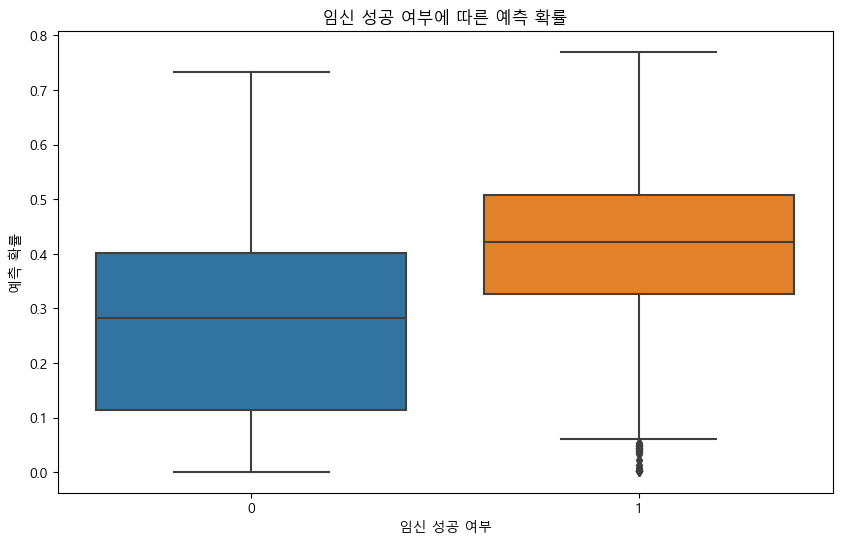

In [9]:
import platform
from matplotlib import rc

# 운영 체제에 따라 폰트 설정
if platform.system() == 'Windows':  # Windows 환경
    rc('font', family='Malgun Gothic')  # 맑은 고딕

# 음수 표시 가능하도록 설정
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns

# y_pred_proba를 임신_성공_여부에 따라 박스플롯으로 출력
result_df = pd.DataFrame({'임신_성공_여부': Total_y_test, '예측_확률': y_pred_proba})

# 박스플롯 출력
plt.figure(figsize=(10, 6))
sns.boxplot(x='임신_성공_여부', y='예측_확률', data=result_df)
plt.title('임신 성공 여부에 따른 예측 확률')
plt.xlabel('임신 성공 여부')
plt.ylabel('예측 확률')
plt.show()

## 제출

In [20]:
# 모델 학습 및 예측
Total_model.fit(Total_X, Total_y)
Total_pred_proba = Total_model.predict_proba(Total_test.drop('ID', axis=1))[:, 1]
Total_test['probability'] = Total_pred_proba

# 최종 제출 파일 생성
submission = Total_test[['ID', 'probability']]
submission = submission.sort_values(by='ID')

In [ ]:
# 제출 파일 저장
submission.to_csv('../submission/code30_total_submit_copy_LgbmCatXgb.csv', index=False, encoding='utf-8')

----

.